## Data Visulization And Exploration

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
df = pd.DataFrame(data=iris.data, columns=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm'])
df.sample(4)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
80,5.5,2.4,3.8,1.1
3,4.6,3.1,1.5,0.2
85,6.0,3.4,4.5,1.6
124,6.7,3.3,5.7,2.1


In [22]:
df.shape

(150, 5)

In [28]:
df["target"] = iris.target
df["target_name"] = df.target.apply(lambda x : iris.target_names[x])
df.sample(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,target_name
142,5.8,2.7,5.1,1.9,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
134,6.1,2.6,5.6,1.4,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
99,5.7,2.8,4.1,1.3,1,versicolor


In [30]:
df.describe(include="all")

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,target_name
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


### 1. Comparison Between various species based on sepal length and width using respective visualization

In [32]:
df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'target', 'target_name'],
      dtype='object')

Text(0, 0.5, 'Sepal Width (cm)')

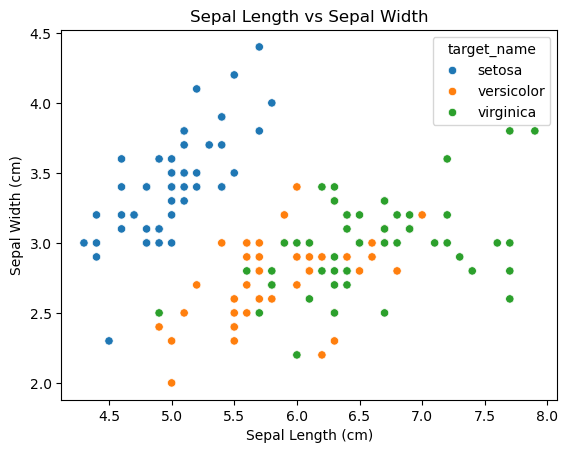

In [34]:
sns.scatterplot(data=df,x="sepal_length_cm",y="sepal_width_cm",hue="target_name",legend=True)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

Text(0, 0.5, 'Petal Width (cm)')

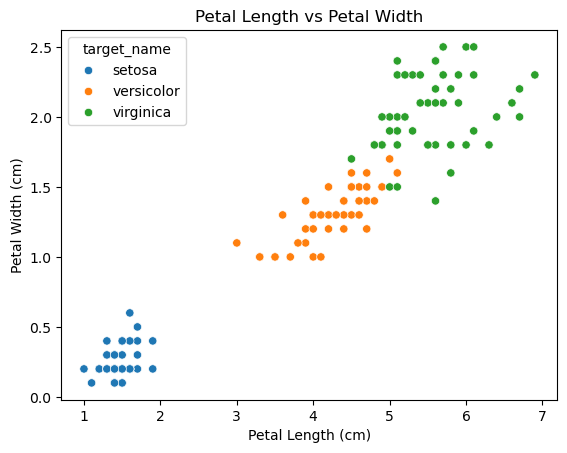

In [36]:
sns.scatterplot(data=df,x="petal_length_cm",y="petal_width_cm",hue="target_name",legend=True)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

### 2. Perform the Bi-variate Analysis via pairplot visualization

Text(0.5, 1.02, 'Pairplot of Iris Dataset')

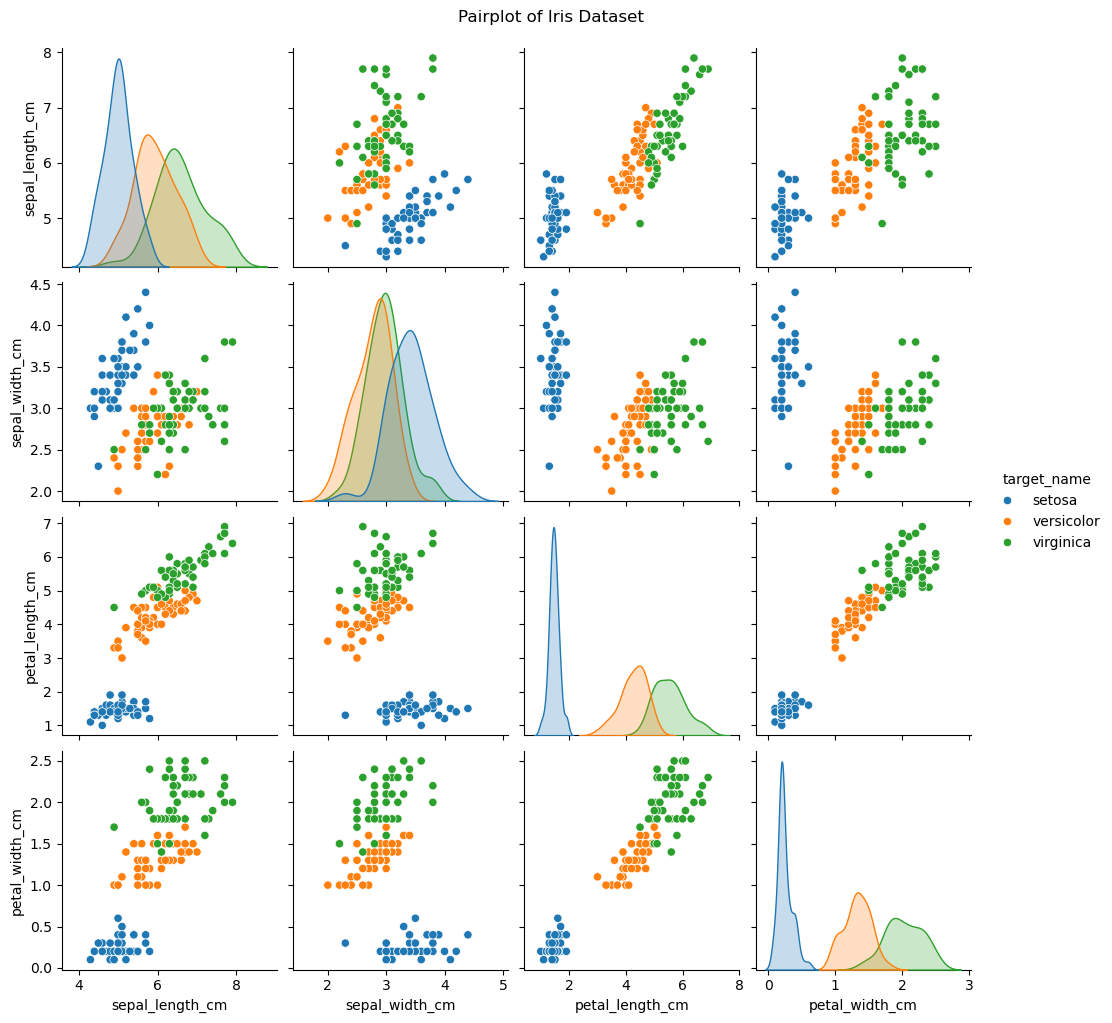

In [69]:
sns.pairplot(data=df.drop("target",axis=1),hue="target_name")
plt.suptitle('Pairplot of Iris Dataset', y=1.02)

### 3. Justify Sepal Length and Sepal Width features are slightly correlated with each other

<Axes: title={'center': 'Correlation between Petal and Sepal size'}>

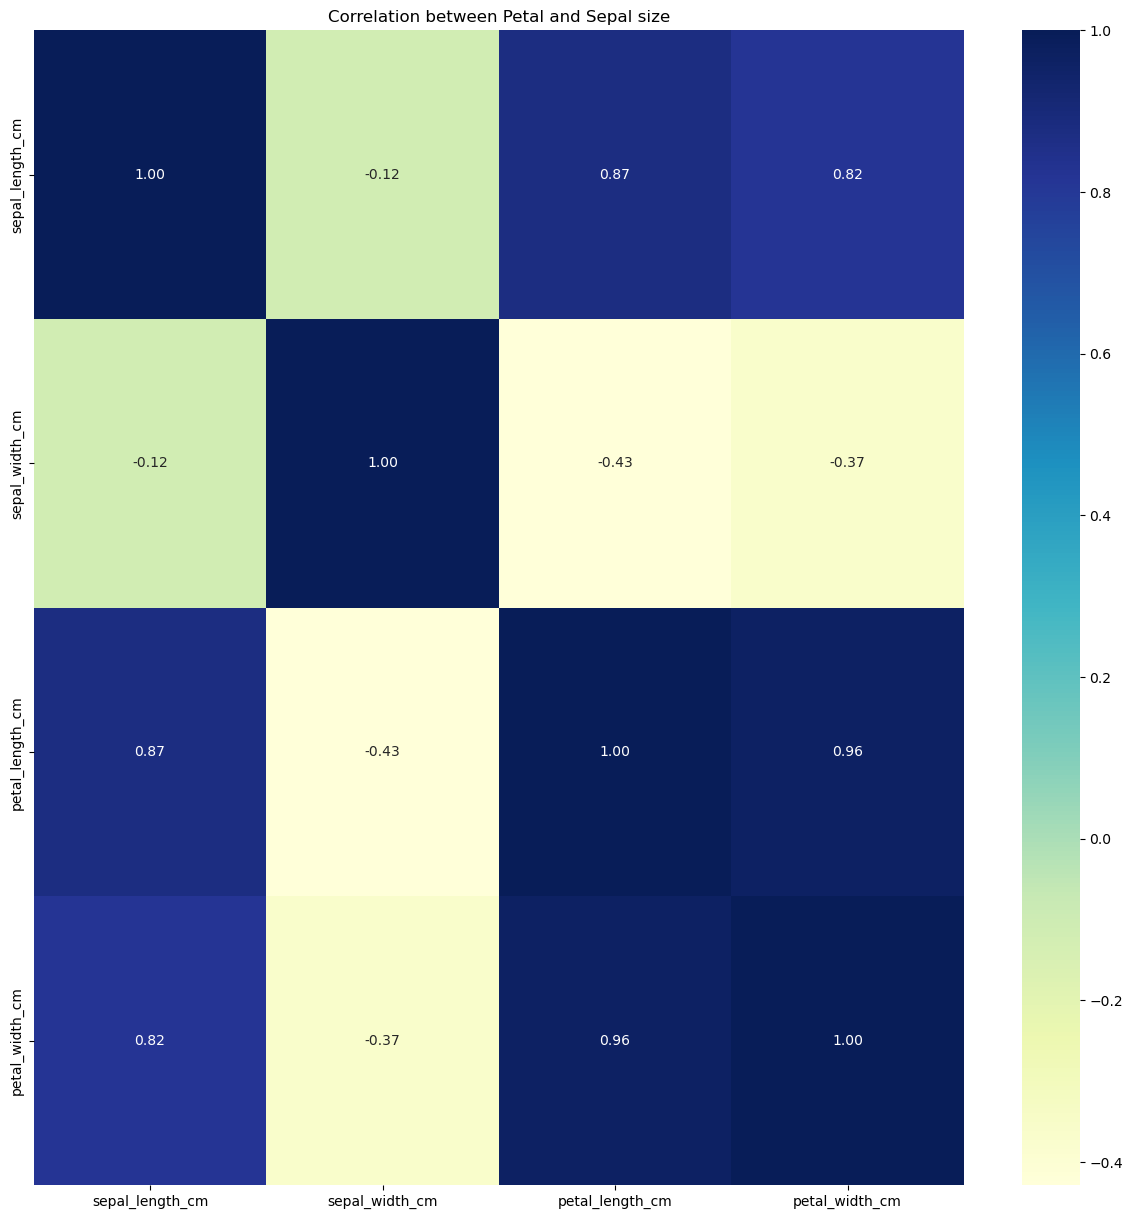

In [56]:
plt.figure(figsize=(15,15))
plt.title("Correlation between Petal and Sepal size")
sns.heatmap(df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']].corr(), annot=True, fmt=".2f", cmap="YlGnBu")

- Sepal length and Sepal width are slightly  negative correlated
- Petal length and Sepal width are highly correlated 0.96 almost one

### 4. Visualize the categorical feature "Species" with all other four input variables

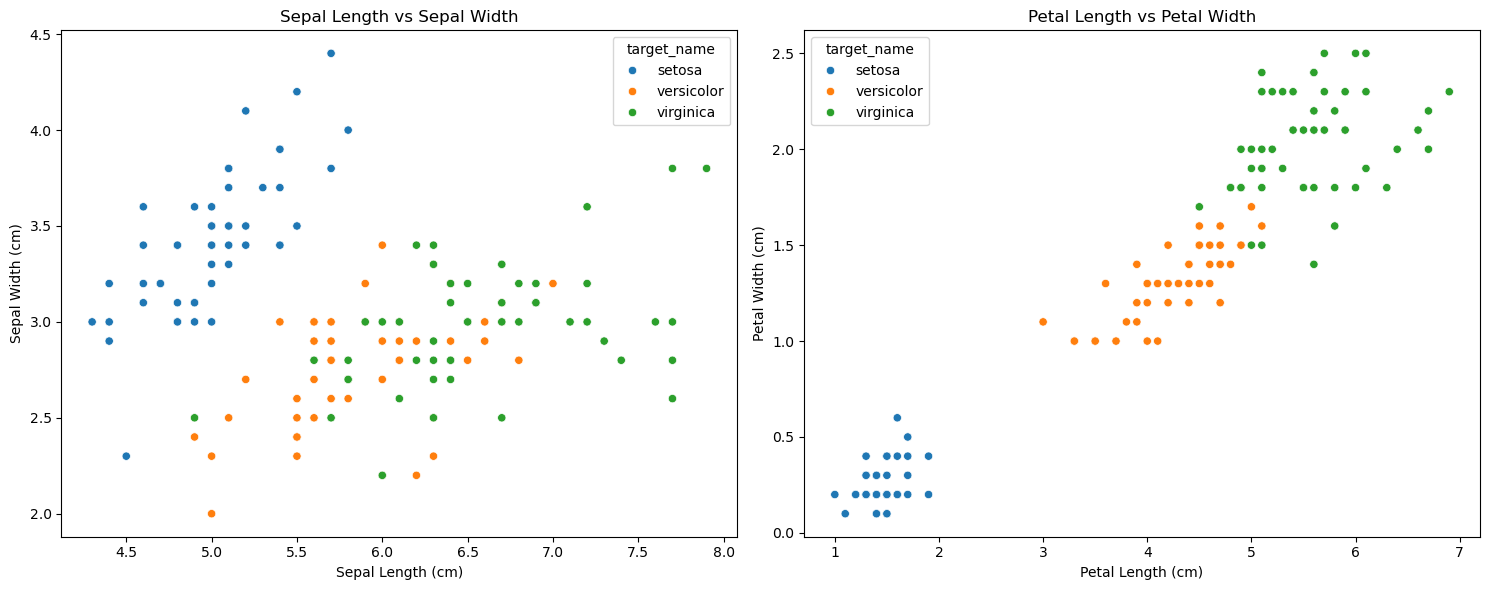

In [77]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(data=df,x="sepal_length_cm",y="sepal_width_cm",hue="target_name",legend=True,ax=ax[0])
ax[0].set_title("Sepal Length vs Sepal Width")
ax[0].set_xlabel("Sepal Length (cm)")
ax[0].set_ylabel("Sepal Width (cm)")


sns.scatterplot(data=df,x="petal_length_cm",y="petal_width_cm",hue="target_name",legend=True,ax=ax[1])
ax[1].set_title("Petal Length vs Petal Width")
ax[1].set_xlabel("Petal Length (cm)")
ax[1].set_ylabel("Petal Width (cm)")

plt.tight_layout()

### 5. Plot the density of the length and width in the species

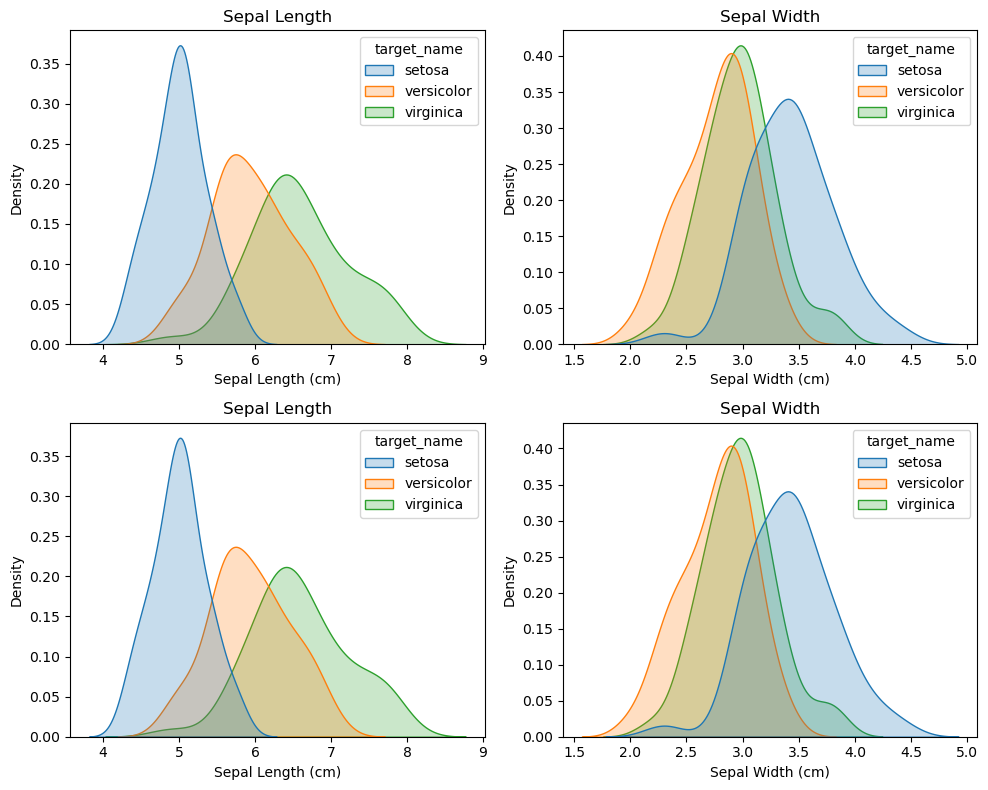

In [89]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

sns.kdeplot(data=df,x="sepal_length_cm", hue="target_name",fill=True,ax=ax[0][0])
ax[0][0].set_title("Sepal Length")
ax[0][0].set_xlabel("Sepal Length (cm)")
ax[0][0].set_ylabel("Density")


sns.kdeplot(data=df,x="sepal_width_cm",hue="target_name",fill=True,ax=ax[0][1])
ax[0][1].set_title("Sepal Width")
ax[0][1].set_xlabel("Sepal Width (cm)")
ax[0][1].set_ylabel("Density")

sns.kdeplot(data=df,x="sepal_length_cm",hue="target_name",fill=True,ax=ax[1][0])
ax[1][0].set_title("Sepal Length")
ax[1][0].set_xlabel("Sepal Length (cm)")
ax[1][0].set_ylabel("Density")


sns.kdeplot(data=df,x="sepal_width_cm",hue="target_name",fill=True,ax=ax[1][1])
ax[1][1].set_title("Sepal Width")
ax[1][1].set_xlabel("Sepal Width (cm)")
ax[1][1].set_ylabel("Density")

plt.tight_layout()

### 6. Plot the probability function(PDF) with each feature as a variable on X-axis and its histogram and corresponding kernel density plot on Y-axis

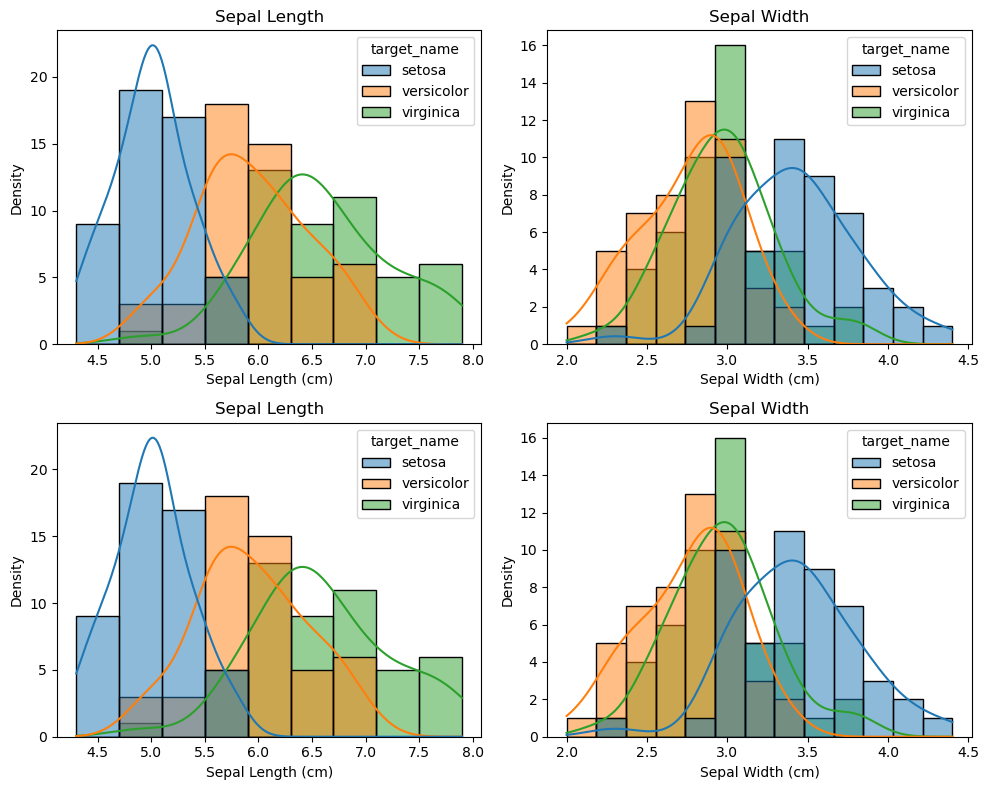

In [93]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

sns.histplot(data=df,x="sepal_length_cm", hue="target_name",kde=True,ax=ax[0][0])
ax[0][0].set_title("Sepal Length")
ax[0][0].set_xlabel("Sepal Length (cm)")
ax[0][0].set_ylabel("Density")


sns.histplot(data=df,x="sepal_width_cm",hue="target_name",kde=True,ax=ax[0][1])
ax[0][1].set_title("Sepal Width")
ax[0][1].set_xlabel("Sepal Width (cm)")
ax[0][1].set_ylabel("Density")

sns.histplot(data=df,x="sepal_length_cm",hue="target_name",kde=True,ax=ax[1][0])
ax[1][0].set_title("Sepal Length")
ax[1][0].set_xlabel("Sepal Length (cm)")
ax[1][0].set_ylabel("Density")


sns.histplot(data=df,x="sepal_width_cm",hue="target_name",kde=True,ax=ax[1][1])
ax[1][1].set_title("Sepal Width")
ax[1][1].set_xlabel("Sepal Width (cm)")
ax[1][1].set_ylabel("Density")

plt.tight_layout()